In [2]:
!pip install xgboost
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


## -----Import Libraries-----

### --Import all the necessary libraries for data manipulation, machine learning, and visualization--

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import xgboost as xgb 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
plt.style.use('dark_background')

In [5]:
import openpyxl

### -- Load the Sydney rainfall prediction data from an Excel file--

In [6]:
df = pd.read_excel('C:/Users/devma/sydney_rain prediction.xlsx')

## -----Initial Data Exploration-----

In [8]:
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes
5,2008-02-06,Sydney,20.2,27.2,1.6,2.6,8.6,69.0,62.0,1002.7,998.6,6.0,6.0,23.8,26.0,Yes,Yes
6,2008-02-07,Sydney,18.6,26.3,6.2,5.2,5.2,75.0,80.0,999.0,1000.3,4.0,7.0,21.7,22.3,Yes,Yes
7,2008-02-08,Sydney,17.2,22.3,27.6,5.8,2.1,77.0,61.0,1008.3,1007.4,7.0,8.0,18.9,21.1,Yes,Yes
8,2008-02-09,Sydney,16.4,20.8,12.6,4.8,3.0,92.0,91.0,1006.4,1007.6,7.0,7.0,17.1,16.5,Yes,Yes
9,2008-02-10,Sydney,14.6,24.2,8.8,4.4,10.1,80.0,53.0,1014.0,1013.4,4.0,2.0,17.2,23.3,Yes,No


In [9]:
df.shape

(3337, 17)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3334 non-null   float64       
 3   MaxTemp       3335 non-null   float64       
 4   Rainfall      3331 non-null   float64       
 5   Evaporation   3286 non-null   float64       
 6   Sunshine      3321 non-null   float64       
 7   Humidity9am   3323 non-null   float64       
 8   Humidity3pm   3324 non-null   float64       
 9   Pressure9am   3317 non-null   float64       
 10  Pressure3pm   3318 non-null   float64       
 11  Cloud9am      2771 non-null   float64       
 12  Cloud3pm      2776 non-null   float64       
 13  Temp9am       3333 non-null   float64       
 14  Temp3pm       3333 non-null   float64       
 15  RainToday     3331 non-null   object  

In [11]:
df.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3337,3334.000000,3335.000000,3331.000000,3286.000000,3321.000000,3323.000000,3324.000000,3317.000000,3318.000000,2771.000000,2776.000000,3333.000000,3333.000000
mean,2012-10-16 01:24:34.737788672,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333
min,2008-02-01 00:00:00,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,2010-05-15 00:00:00,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.700000,1011.300000,1.000000,1.000000,13.800000,18.400000
50%,2012-09-28 00:00:00,14.900000,22.800000,0.000000,4.800000,8.300000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000
75%,2015-03-14 00:00:00,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,65.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,2017-06-25 00:00:00,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000
std,NaN,4.553641,4.494638,9.895172,2.777407,3.810886,15.085355,16.293530,7.021571,7.032211,2.749578,2.641885,4.897177,4.303737


In [12]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
       'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

## -----Checking for any missing-----

In [14]:
df.isnull().sum()

Date              0
Location          0
MinTemp           3
MaxTemp           2
Rainfall          6
Evaporation      51
Sunshine         16
Humidity9am      14
Humidity3pm      13
Pressure9am      20
Pressure3pm      19
Cloud9am        566
Cloud3pm        561
Temp9am           4
Temp3pm           4
RainToday         6
RainTomorrow      0
dtype: int64

## ----- Impute Missing Values-----

In [16]:
# Imputing missing values
# For numerical variables
df['MinTemp'].fillna(df['MinTemp'].mean(), inplace=True)
df['MaxTemp'].fillna(df['MaxTemp'].mean(), inplace=True)
df['Rainfall'].fillna(df['Rainfall'].mean(), inplace=True)
df['Evaporation'].fillna(df['Evaporation'].median(), inplace=True)
df['Sunshine'].fillna(df['Sunshine'].median(), inplace=True)
df['Temp9am'].fillna(df['Temp9am'].mean(), inplace=True)
df['Temp3pm'].fillna(df['Temp3pm'].mean(), inplace=True)

# For categorical variables
df['RainToday'].fillna(df['RainToday'].mode()[0], inplace=True)

# Dropping columns with too many missing values
df.drop(['Cloud9am', 'Cloud3pm'], axis=1, inplace=True)

# Handling missing values for humidity and pressure with median values
for column in ['Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm']:
    df[column].fillna(df[column].median(), inplace=True)

# Check if there are any missing values left
print(df.isnull().sum())

df.shape

Date            0
Location        0
MinTemp         0
MaxTemp         0
Rainfall        0
Evaporation     0
Sunshine        0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Temp9am         0
Temp3pm         0
RainToday       0
RainTomorrow    0
dtype: int64


C:\Users\devma\AppData\Local\Temp\ipykernel_17008\4283995531.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MinTemp'].fillna(df['MinTemp'].mean(), inplace=True)
C:\Users\devma\AppData\Local\Temp\ipykernel_17008\4283995531.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


(3337, 15)

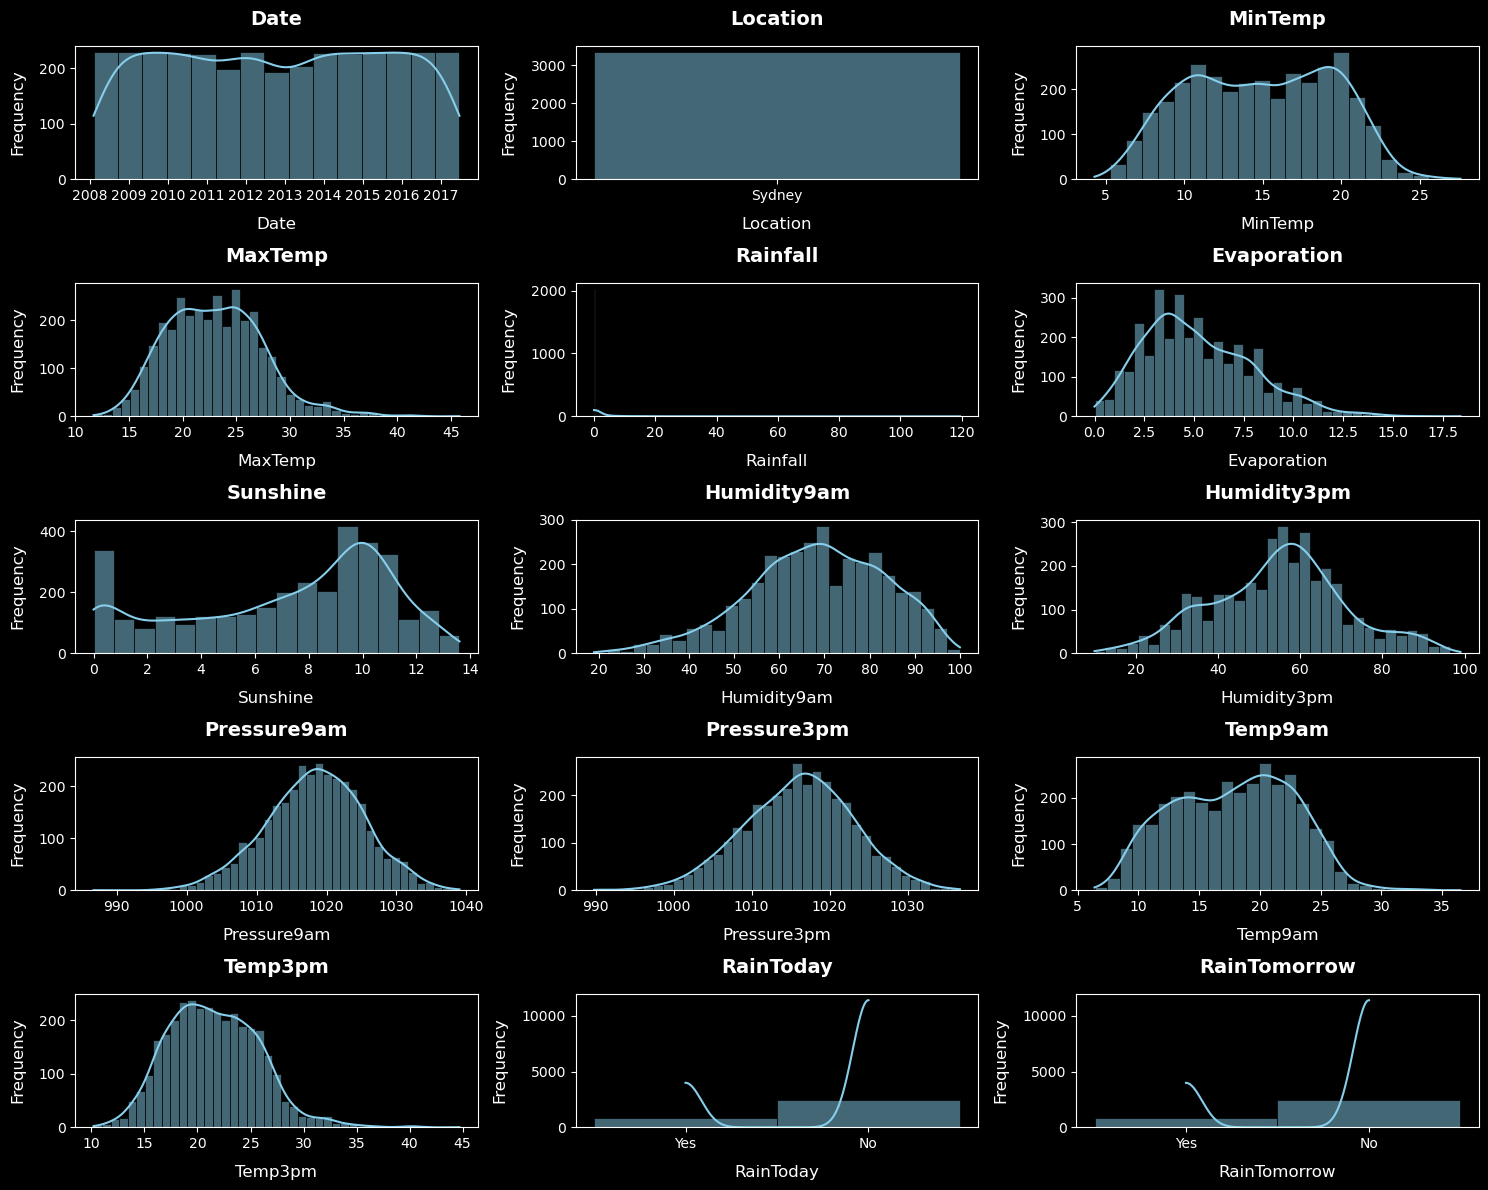

In [98]:
plt.figure(figsize=(15, 12)) 

for i, column in enumerate(df.columns):
    plt.subplot(5, 3, i + 1)  # Adjusted Subplot Grid for More Room
    sns.histplot(df[column], kde=True, color='skyblue', edgecolor='black', linewidth=0.5) 
    plt.title(column, fontsize=14, fontweight='bold', pad=15)  
    plt.xlabel(column, fontsize=12, labelpad=10)  
    plt.ylabel('Frequency', fontsize=12, labelpad=10)  

plt.tight_layout()
plt.show()

## -----Visualize Outliers-----

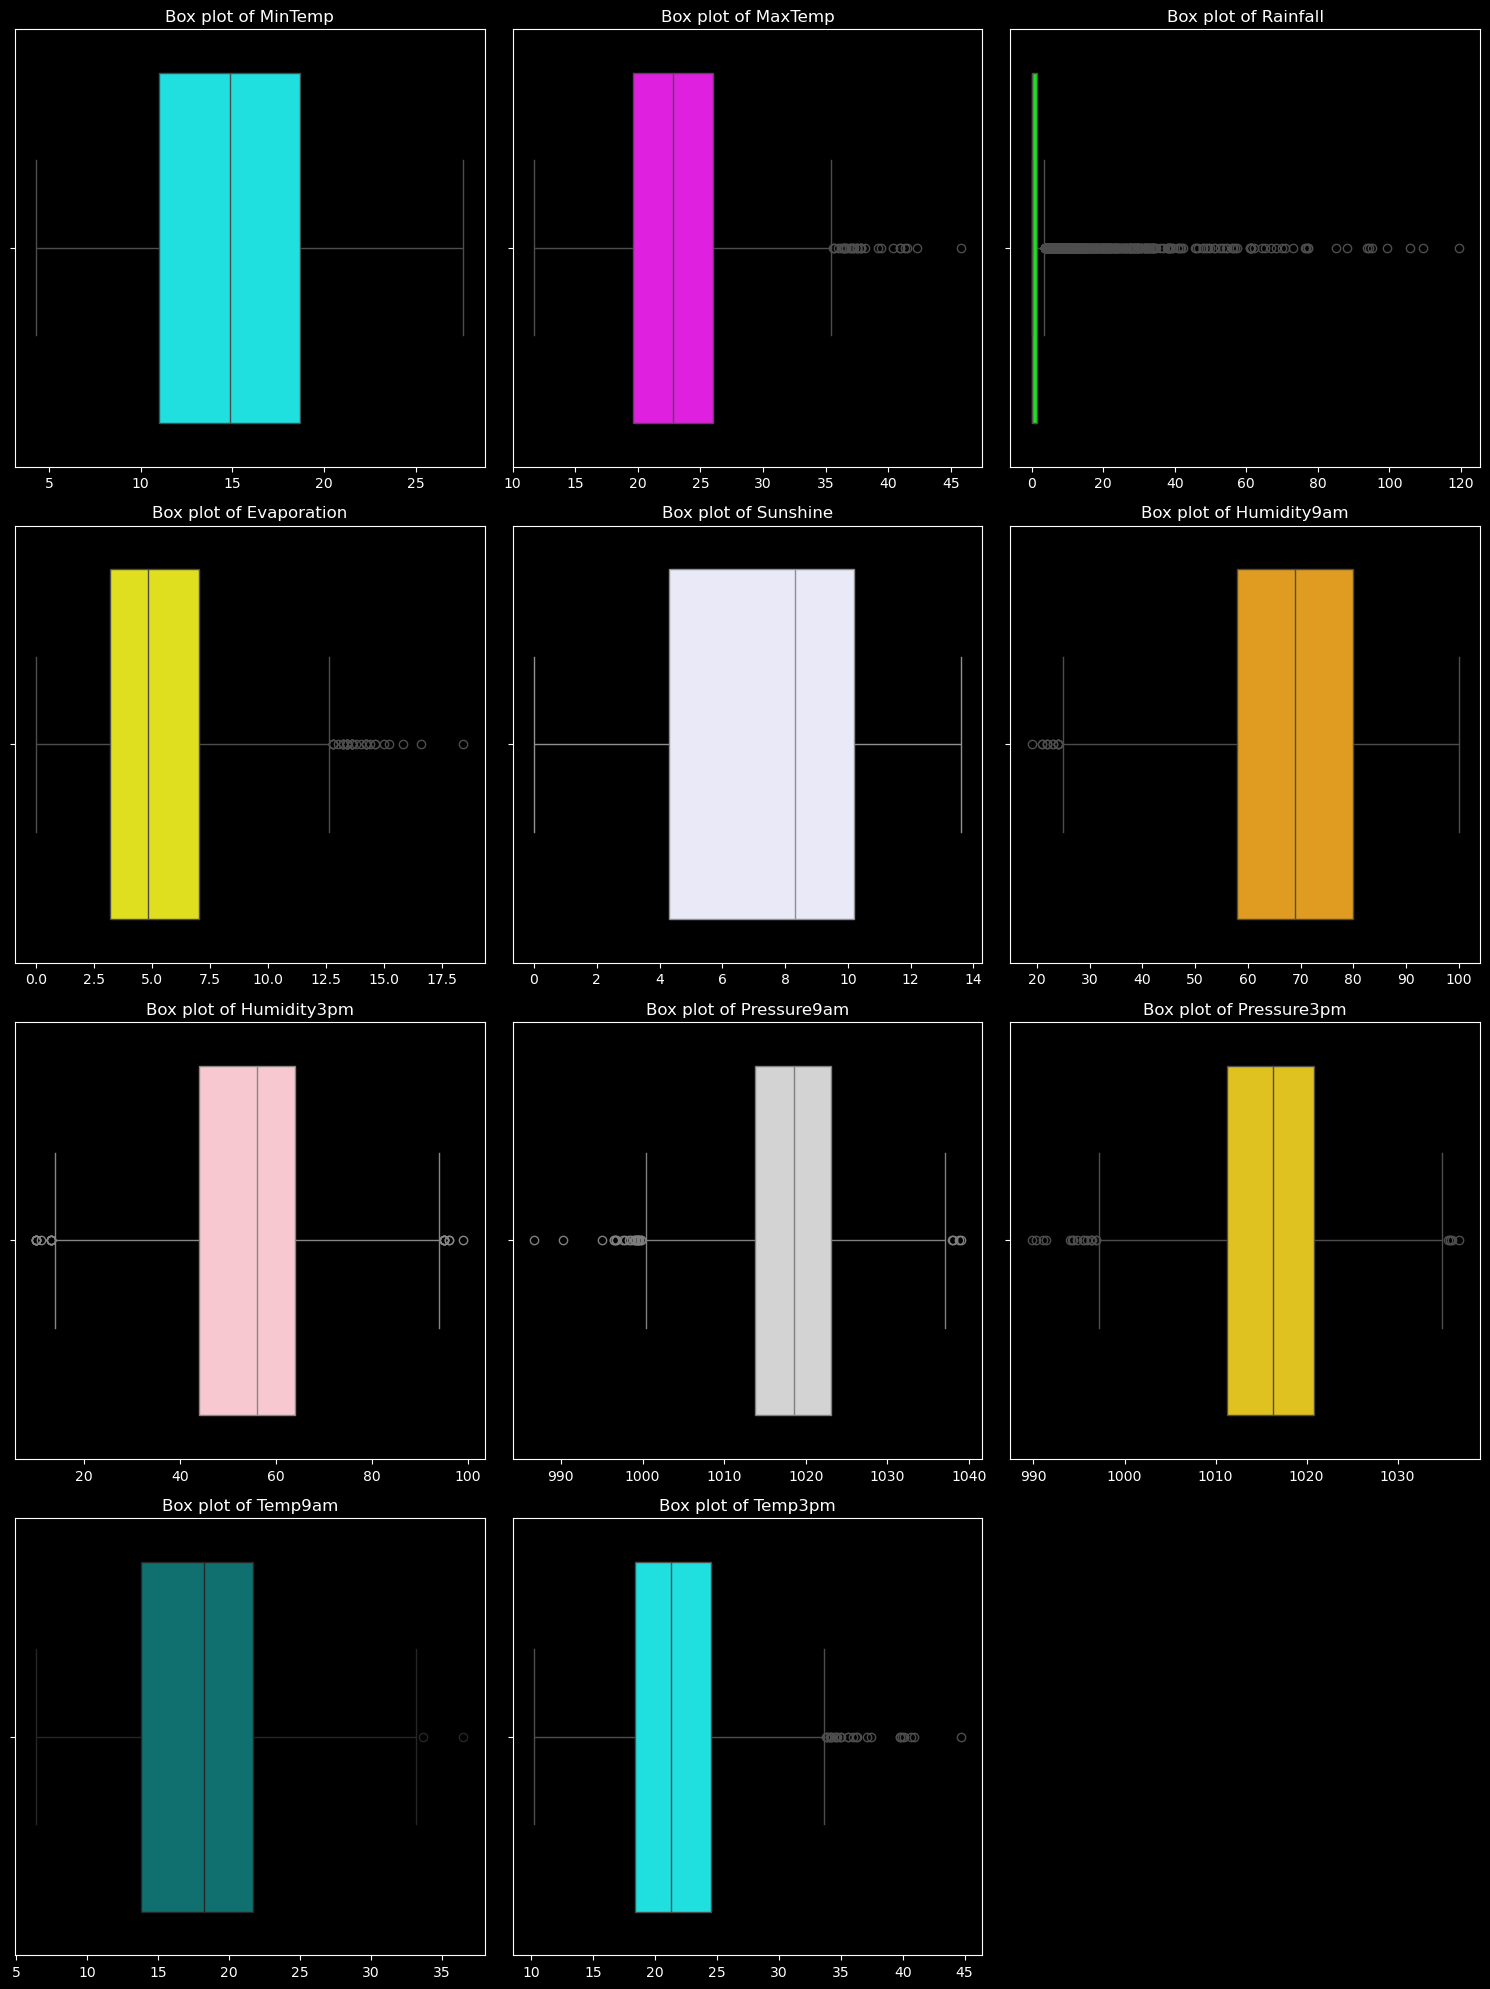

In [100]:
# Treat Outliers
# List of numerical columns you want to plot
numerical_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
                     'Sunshine', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
                     'Pressure3pm', 'Temp9am', 'Temp3pm']

# Determine the layout of the subplots
num_columns = 3
num_rows = (len(numerical_columns) + num_columns - 1) // num_columns

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(15, 20))
axes = axes.flatten()

# Define a list of colors
colors = ["cyan", "magenta", "lime", "yellow", "lavender", "orange", "pink", "lightgray", "gold", "teal"]

# Iterate over the columns and create a boxplot for each one
for i, col in enumerate(numerical_columns):
    # Use a color from the list 
    sns.boxplot(x=df[col], ax=axes[i], color=colors[i % len(colors)])  # Cycle through colors
    axes[i].set_title(f'Box plot of {col}', fontsize=12)
    axes[i].set_xlabel('')

for ax in axes[len(numerical_columns):]:
    ax.axis('off')

# Adjust layout for better fit and display the plot
plt.tight_layout()
plt.show()

## ----- Visualize Outliers Again-----

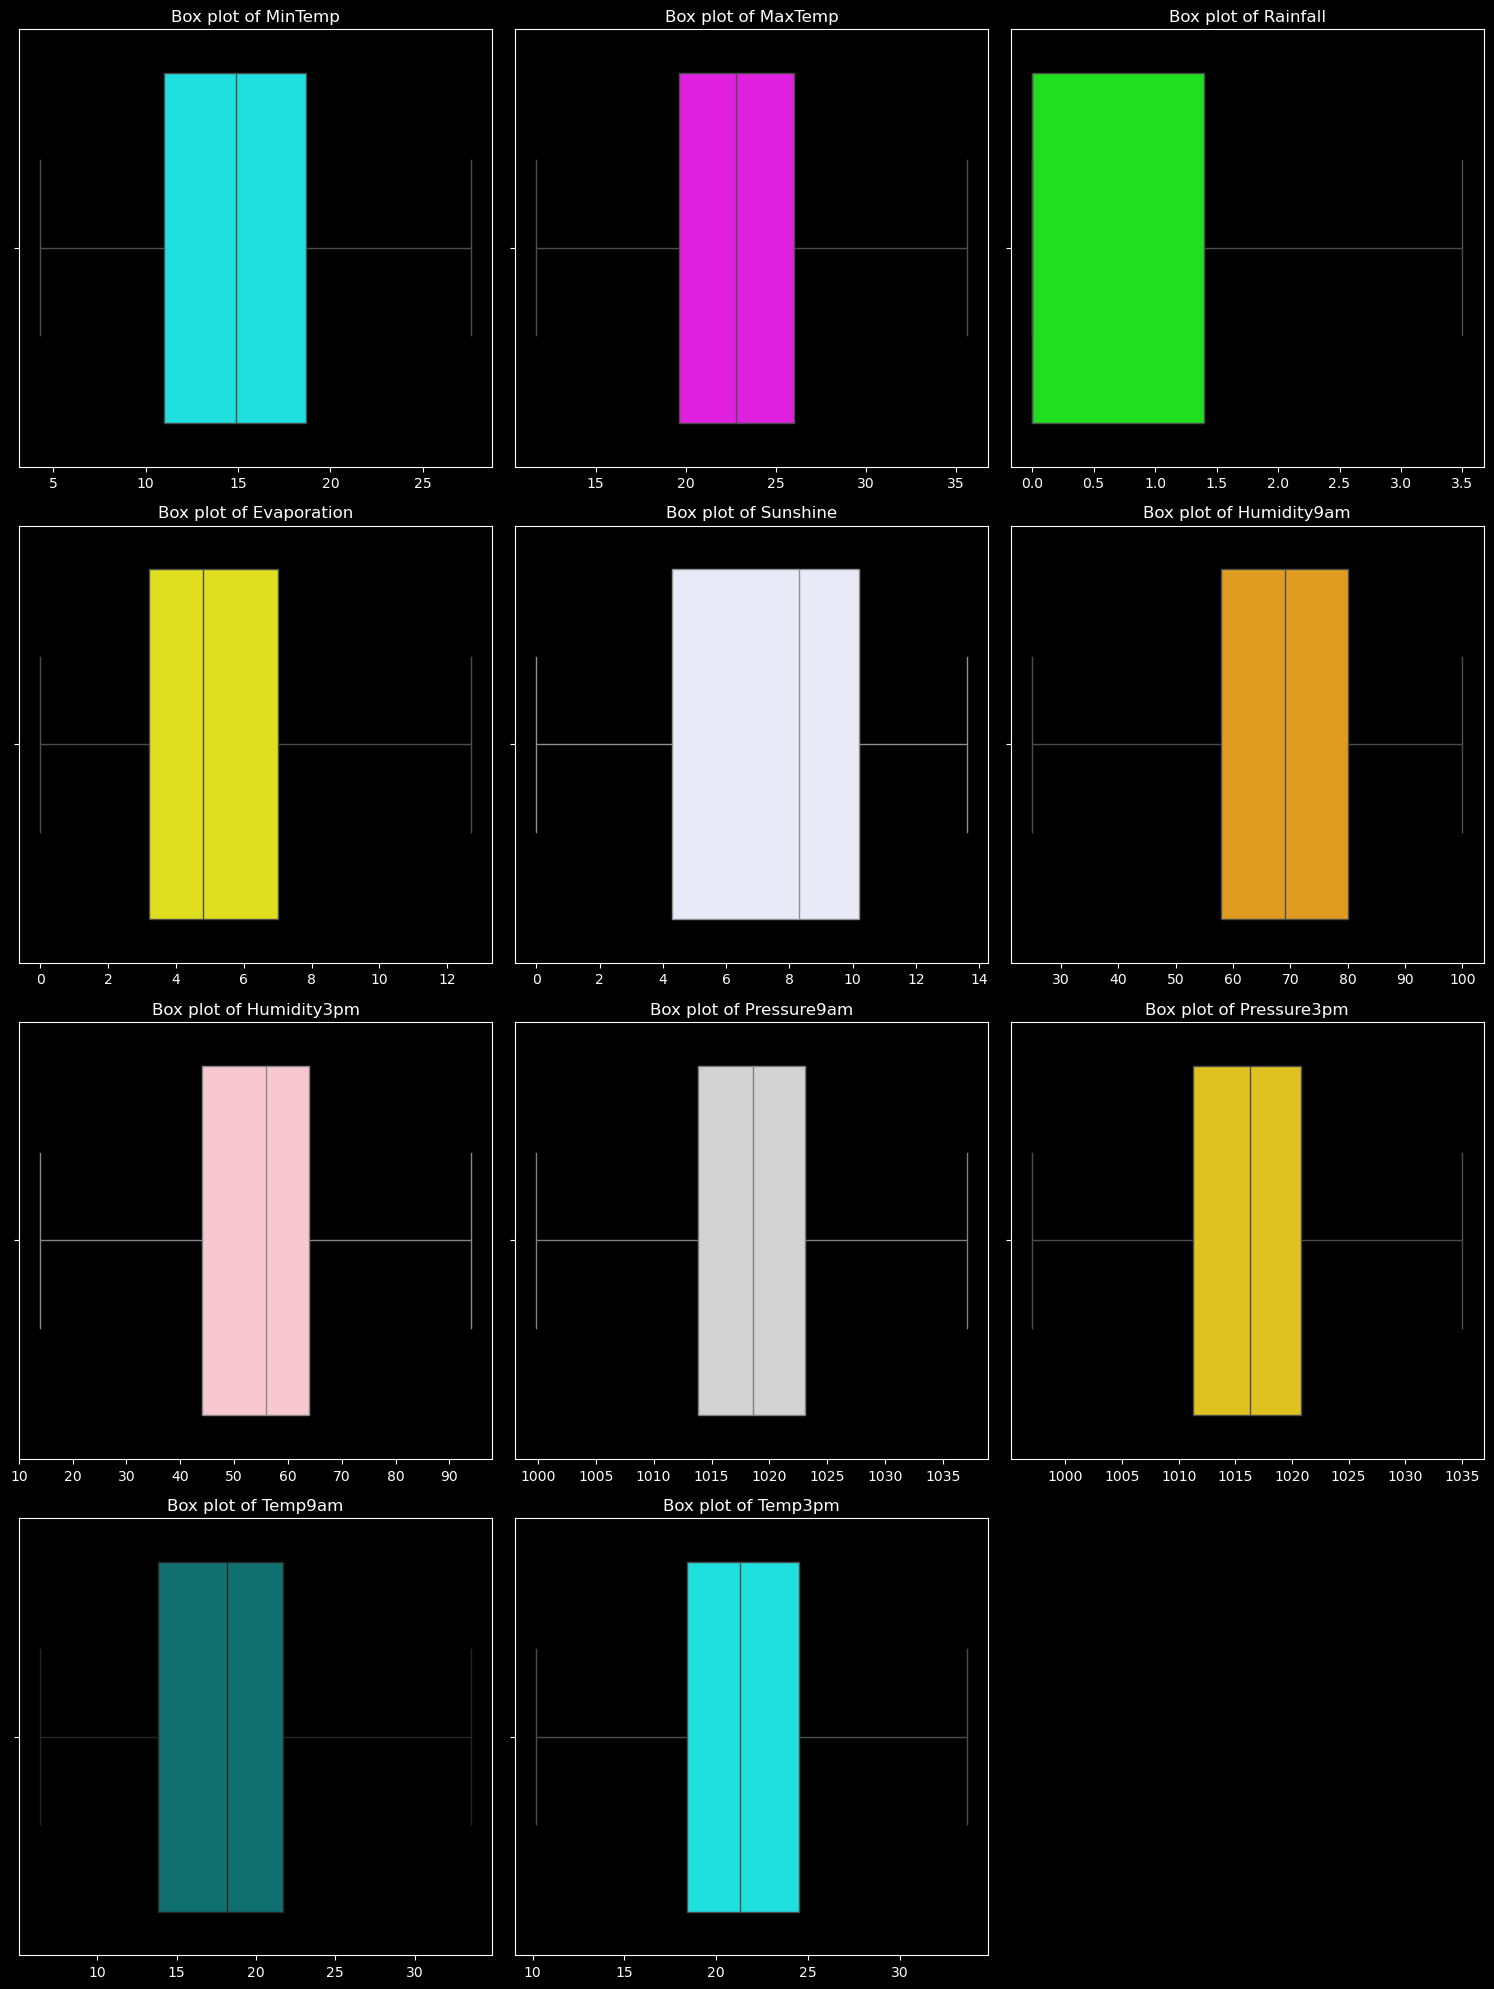

In [102]:
# Define a list of colors
colors = ["cyan", "magenta", "lime", "yellow", "lavender", "orange", "pink", "lightgray", "gold", "teal"]

# Treat Outliers 
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] > upper, upper, np.where(df[column] < lower, lower, df[column]))

# Draw Box plot again after outlier treatment to check outliers are removed or reduced
# Determine the layout of the subplots
num_columns = 3
num_rows = (len(numerical_columns) + num_columns - 1) // num_columns

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(15, 20))
axes = axes.flatten()

# Iterate over the columns and create a boxplot for each one
for i, col in enumerate(numerical_columns):
    # Use a color from the list 
    sns.boxplot(x=df[col], ax=axes[i], color=colors[i % len(colors)])  # Cycle through colors
    axes[i].set_title(f'Box plot of {col}', fontsize=12)
    axes[i].set_xlabel('')

for ax in axes[len(numerical_columns):]:
    ax.axis('off')

# Adjust layout for better fit and display the plot
plt.tight_layout()
plt.show()


<Axes: xlabel='MaxTemp', ylabel='MinTemp'>

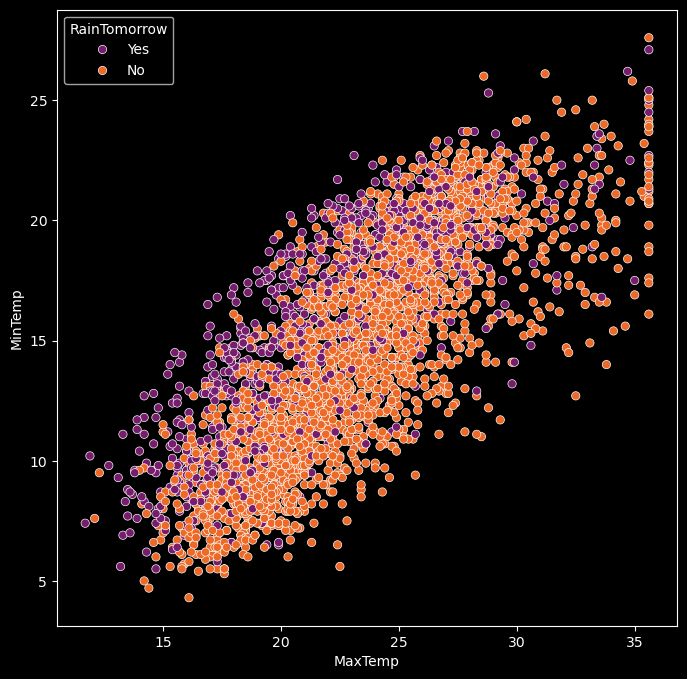

In [104]:
plt.figure(figsize = (8,8))
sns.scatterplot(x='MaxTemp',y='MinTemp',hue='RainTomorrow',palette='inferno',data=df)

<Axes: xlabel='Humidity9am', ylabel='Temp9am'>

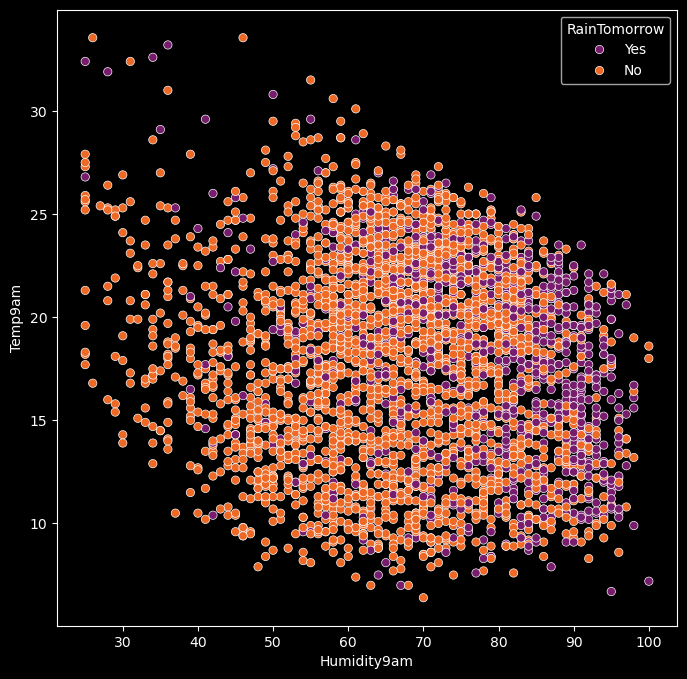

In [106]:
plt.figure(figsize = (8,8))
sns.scatterplot(x='Humidity9am',y='Temp9am',hue='RainTomorrow',palette='inferno',data=df)

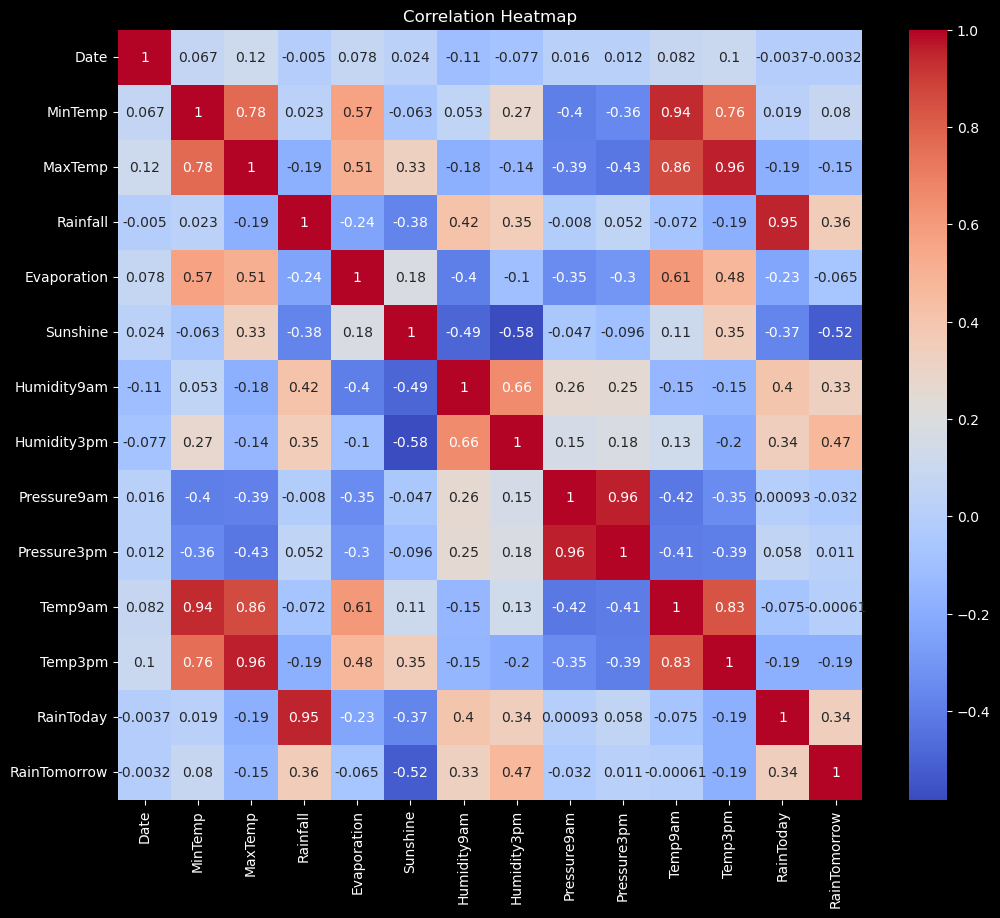

In [108]:
df_for_correlation = df.drop('Location', axis=1)  # Remove Location
df_for_correlation['RainToday'] = df_for_correlation['RainToday'].map({'Yes': 1, 'No': 0})  # Convert RainToday
df_for_correlation['RainTomorrow'] = df_for_correlation['RainTomorrow'].map({'Yes': 1, 'No': 0})  # Convert RainTomorrow

plt.figure(figsize=(12, 10))  
correlation_matrix = df_for_correlation.corr()  # Now it should work
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm') 
plt.title('Correlation Heatmap')
plt.show()

## -----Visualize Target Variable Distribution-----

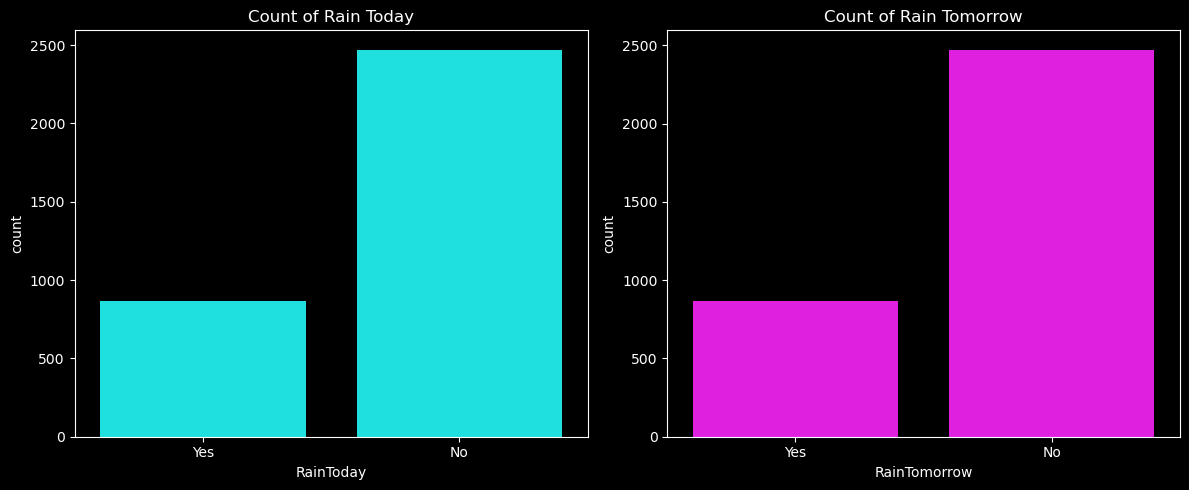

In [110]:
# Create df1 DataFrame if you haven't already
df1 = df.copy()

# df1 is the DataFrame and RainToday, RainTomorrow are the columns
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='RainToday', data=df1, color="cyan")  
plt.title('Count of Rain Today', color='white') 
plt.xticks(color='white')  
plt.subplot(1, 2, 2)
sns.countplot(x='RainTomorrow', data=df1, color="magenta")  
plt.title('Count of Rain Tomorrow', color='white') 
plt.xticks(color='white') 

plt.tight_layout()
plt.show()

## -----Analyze Target Variable Counts-----

In [25]:
# Display the count of 'Yes' and 'No' values in the 'RainToday' column
df1['RainToday'].value_counts()

# Display the count of location values in the 'Location' column
df1['Location'].value_counts()

# drop Location column because having a single value sydney
df1.drop('Location',axis = 1, inplace=True)

## -----Create Seasons Feature-----

In [27]:
# Feature Engineering

# Assuming 'Date' is in datetime format, if not, convert it
df1['Date'] = pd.to_datetime(df1['Date'])

# Extract the month from the date
df1['Month'] = df1['Date'].dt.month

# Define a function to map the month to the season
def map_season(month):
    if month in [12, 1, 2]:
        return 'Summer'
    elif month in [3, 4, 5]:
        return 'Autumn'
    elif month in [6, 7, 8]:
        return 'Winter'
    else:
        return 'Spring'

# Apply the function to the 'Month' column to create the 'Season' column
df1['Season'] = df1['Month'].apply(map_season)

df1.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Season
0,2008-02-01,19.5,22.4,3.5,6.2,0.0,92.0,84.0,1017.6,1017.4,20.7,20.9,Yes,Yes,2,Summer
1,2008-02-02,19.5,25.6,3.5,3.4,2.7,83.0,73.0,1017.9,1016.4,22.4,24.8,Yes,Yes,2,Summer
2,2008-02-03,21.6,24.5,3.5,2.4,0.1,88.0,86.0,1016.7,1015.6,23.5,23.0,Yes,Yes,2,Summer
3,2008-02-04,20.2,22.8,3.5,2.2,0.0,83.0,90.0,1014.2,1011.8,21.4,20.9,Yes,Yes,2,Summer
4,2008-02-05,19.7,25.7,3.5,4.8,0.0,88.0,74.0,1008.3,1004.8,22.5,25.5,Yes,Yes,2,Summer


## -----Analyze Season Counts-----

In [29]:
df1['Season'].value_counts()

df1.drop(['Date','Month'],axis = 1, inplace=True)

## -----Scale Numerical Features-----

In [31]:
# Create a scaler object
scaler = StandardScaler()

# List of numerical columns to scale
numerical_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                  'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
                  'Temp9am', 'Temp3pm']

# Fit and transform the data
df1[numerical_cols] = scaler.fit_transform(df1[numerical_cols])

# Check the transformed data
df1.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Season
0,1.018465,-0.130924,1.888233,0.379966,-1.889751,1.581397,1.805100,-0.109680,0.196323,0.589169,-0.144626,Yes,Yes,Summer
1,1.018465,0.594922,1.888233,-0.651424,-1.179590,0.982344,1.127223,-0.066487,0.052807,0.936800,0.779732,Yes,Yes,Summer
2,1.479911,0.345413,1.888233,-1.019778,-1.863448,1.315151,1.928350,-0.239259,-0.062006,1.161737,0.353105,Yes,Yes,Summer
3,1.172280,-0.040193,1.888233,-1.093448,-1.889751,0.982344,2.174851,-0.599201,-0.607365,0.732311,-0.144626,Yes,Yes,Summer
4,1.062412,0.617605,1.888233,-0.135729,-1.889751,1.315151,1.188848,-1.448663,-1.611975,0.957249,0.945642,Yes,Yes,Summer


## -----One-Hot Encode Categorical Features-----

In [33]:
# Assume 'df' is your DataFrame
categorical_cols = ['Season']
df1 = pd.get_dummies(df1, columns=categorical_cols)
df1['Season_Autumn'] = df1['Season_Autumn'].astype(int)
df1['Season_Spring'] = df1['Season_Spring'].astype(int)
df1['Season_Summer'] = df1['Season_Summer'].astype(int)
df1['Season_Winter'] = df1['Season_Winter'].astype(int)

## ----- Encode RainToday and RainTomorrow-----

In [35]:
# Assuming 'Yes' and 'No' are the values in the RainToday and RainTomorrow columns
df1['RainToday'] = df1['RainToday'].map({'Yes': 1, 'No': 0})
df1['RainTomorrow'] = df1['RainTomorrow'].map({'Yes': 1, 'No': 0})

df1.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,1.018465,-0.130924,1.888233,0.379966,-1.889751,1.581397,1.805100,-0.109680,0.196323,0.589169,-0.144626,1,1,0,0,1,0
1,1.018465,0.594922,1.888233,-0.651424,-1.179590,0.982344,1.127223,-0.066487,0.052807,0.936800,0.779732,1,1,0,0,1,0
2,1.479911,0.345413,1.888233,-1.019778,-1.863448,1.315151,1.928350,-0.239259,-0.062006,1.161737,0.353105,1,1,0,0,1,0
3,1.172280,-0.040193,1.888233,-1.093448,-1.889751,0.982344,2.174851,-0.599201,-0.607365,0.732311,-0.144626,1,1,0,0,1,0
4,1.062412,0.617605,1.888233,-0.135729,-1.889751,1.315151,1.188848,-1.448663,-1.611975,0.957249,0.945642,1,1,0,0,1,0


## ------Separate Features and Target Variable-----

In [37]:
# Features and target variable
X = df1.drop('RainTomorrow', axis=1)
y = df1['RainTomorrow']

## -----Split Data into Training and Testing Sets-----

In [39]:
from imblearn.over_sampling import SMOTE

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting splits
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (2669, 16) (2669,)
Testing set shape: (668, 16) (668,)


## -----Oversample Minority Class Using SMOTE-----

In [41]:
# Applying SMOTE to the training data to balance the data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

y_train_smote.value_counts()

RainTomorrow
0    1988
1    1988
Name: count, dtype: int64

## -----Define Models to Evaluate-----

In [43]:
# List of models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": make_pipeline(StandardScaler(), SVC(probability=True)),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Dictionary to hold model results
results = {}

In [44]:
# Evaluate each model
for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred_train = model.predict(X_train_smote)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
 # Compute metrics
    accuracy_Train = accuracy_score(y_train_smote, y_pred_train)
    accuracy_Test = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Store results
    results[name] = {
        "Train Accuracy": accuracy_Train,
        "Test Accuracy": accuracy_Test,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC": auc,
        "Confusion Matrix": conf_matrix,
        "Classification Report": class_report
    }

    # print results for each model
for name, model in models.items():
    # ... (rest of the code inside the for loop)
    print(f"Results for {name}:")
    print("Train Accuracy:", accuracy_Train)
    print("Test Accuracy:", accuracy_Test)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("AUC:", auc)  # This line needs to be indented to the same level as the other print statements inside the loop.
    print(" ")
    print("Confusion Matrix:\n", conf_matrix)
    print(" ")
    print("Classification Report:\n", class_report)
    print("-" * 50)
    print("\n")

C:\Users\devma\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [14:25:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Results for Logistic Regression:
Train Accuracy: 0.9994969818913481
Test Accuracy: 0.7874251497005988
Precision: 0.6039603960396039
Recall: 0.6630434782608695
F1 Score: 0.6321243523316062
AUC: 0.8304999101688825
 
Confusion Matrix:
 [[404  80]
 [ 62 122]]
 
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85       484
           1       0.60      0.66      0.63       184

    accuracy                           0.79       668
   macro avg       0.74      0.75      0.74       668
weighted avg       0.79      0.79      0.79       668

--------------------------------------------------


Results for K-Nearest Neighbors:
Train Accuracy: 0.9994969818913481
Test Accuracy: 0.7874251497005988
Precision: 0.6039603960396039
Recall: 0.6630434782608695
F1 Score: 0.6321243523316062
AUC: 0.8304999101688825
 
Confusion Matrix:
 [[404  80]
 [ 62 122]]
 
Classification Report:
               precision    recall  f1-score   support

 

In [45]:
# Setting up the hyperparameter grid for each model
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [1, 3]
}

In [46]:
# Random Forest tuning
grid_rf_tuned = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=3, scoring='accuracy', verbose=1)
grid_rf_tuned.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [47]:
# Gradient Boosting tuning
grid_gb_tuned = GridSearchCV(GradientBoostingClassifier(), param_grid_gb, cv=3, scoring='accuracy', verbose=1)
grid_gb_tuned.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [48]:
# XGBoost tuning
grid_xgb_tuned = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_grid_xgb, cv=3, scoring='accuracy', verbose=1)
grid_xgb_tuned.fit(X_train, y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


C:\Users\devma\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [14:27:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\devma\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [14:27:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\devma\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [14:27:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg,

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'min_child_weight': [1, 3], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [49]:
# Dictionary to hold model results
results = {}

# Models with their respective grid search objects
models_tuned = {
    'Tuned Random Forest': grid_rf_tuned,
    'Tuned Gradient Boosting': grid_gb_tuned,
    'Tuned XGBoost': grid_xgb_tuned
}

# Evaluate each tuned model
for name, grid in models_tuned.items():
    # Best estimator found by Grid Search
    best_model = grid.best_estimator_

    # Predictions on training and testing sets
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    y_test_proba = best_model.predict_proba(X_test)[:, 1]

    # Compute metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    auc = roc_auc_score(y_test, y_test_proba)
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    class_report = classification_report(y_test, y_test_pred)

    # Store results
    results[name] = {
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC": auc,
        "Confusion Matrix": conf_matrix,
        "Classification Report": class_report
    }

    # Print results for each model
    print(f"Results for {name}:")
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")
    print("Confusion Matrix:\n", conf_matrix)
    print(" ")
    print("\nClassification Report:\n", class_report)
    print(" ")
    print("-" * 50)

Results for Tuned Random Forest:
Train Accuracy: 0.9247
Test Accuracy: 0.8308
Precision: 0.7669
Recall: 0.5543
F1 Score: 0.6435
AUC: 0.8548
Confusion Matrix:
 [[453  31]
 [ 82 102]]
 

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89       484
           1       0.77      0.55      0.64       184

    accuracy                           0.83       668
   macro avg       0.81      0.75      0.77       668
weighted avg       0.82      0.83      0.82       668

 
--------------------------------------------------
Results for Tuned Gradient Boosting:
Train Accuracy: 0.8794
Test Accuracy: 0.8249
Precision: 0.7481
Recall: 0.5489
F1 Score: 0.6332
AUC: 0.8532
Confusion Matrix:
 [[450  34]
 [ 83 101]]
 

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88       484
           1       0.75      0.55      0.63       184

    accuracy                      

In [50]:
# Dictionary to hold model results
results = {}

# Models with their respective grid search objects
models_tuned = {
    'Tuned Random Forest': grid_rf_tuned,
    'Tuned Gradient Boosting': grid_gb_tuned,
    'Tuned XGBoost': grid_xgb_tuned
}

# Evaluate each tuned model
for name, grid in models_tuned.items():
    # Best estimator found by Grid Search
    best_model = grid.best_estimator_

    # Predictions on training and testing sets
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    y_test_proba = best_model.predict_proba(X_test)[:, 1]

    # Compute metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    auc = roc_auc_score(y_test, y_test_proba)
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    class_report = classification_report(y_test, y_test_pred)

    # Store results
    results[name] = {
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC": auc,
        "Confusion Matrix": conf_matrix,
        "Classification Report": class_report
    }

    # Print results for each model
    print(f"Results for {name}:")
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")
    print("Confusion Matrix:\n", conf_matrix)
    print(" ")
    print("\nClassification Report:\n", class_report)
    print(" ")
    print("-" * 50)

Results for Tuned Random Forest:
Train Accuracy: 0.9247
Test Accuracy: 0.8308
Precision: 0.7669
Recall: 0.5543
F1 Score: 0.6435
AUC: 0.8548
Confusion Matrix:
 [[453  31]
 [ 82 102]]
 

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89       484
           1       0.77      0.55      0.64       184

    accuracy                           0.83       668
   macro avg       0.81      0.75      0.77       668
weighted avg       0.82      0.83      0.82       668

 
--------------------------------------------------
Results for Tuned Gradient Boosting:
Train Accuracy: 0.8794
Test Accuracy: 0.8249
Precision: 0.7481
Recall: 0.5489
F1 Score: 0.6332
AUC: 0.8532
Confusion Matrix:
 [[450  34]
 [ 83 101]]
 

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88       484
           1       0.75      0.55      0.63       184

    accuracy                      

In [51]:
# Dictionary to hold model results
results = {}

# Models with their respective grid search objects
models_tuned = {
    'Tuned Random Forest': grid_rf_tuned,
    'Tuned Gradient Boosting': grid_gb_tuned,
    'Tuned XGBoost': grid_xgb_tuned
}

# Evaluate each tuned model
for name, grid in models_tuned.items():
    # Best estimator found by Grid Search
    best_model = grid.best_estimator_

    # Predictions on training and testing sets
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    y_test_proba = best_model.predict_proba(X_test)[:, 1]

    # Compute metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    auc = roc_auc_score(y_test, y_test_proba)
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    class_report = classification_report(y_test, y_test_pred)

    # Store results
    results[name] = {
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC": auc,
        "Confusion Matrix": conf_matrix,
        "Classification Report": class_report
    }

    # Print results for each model
    print(f"Results for {name}:")
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")
    print("Confusion Matrix:\n", conf_matrix)
    print(" ")
    print("\nClassification Report:\n", class_report)
    print(" ")
    print("-" * 50)

Results for Tuned Random Forest:
Train Accuracy: 0.9247
Test Accuracy: 0.8308
Precision: 0.7669
Recall: 0.5543
F1 Score: 0.6435
AUC: 0.8548
Confusion Matrix:
 [[453  31]
 [ 82 102]]
 

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89       484
           1       0.77      0.55      0.64       184

    accuracy                           0.83       668
   macro avg       0.81      0.75      0.77       668
weighted avg       0.82      0.83      0.82       668

 
--------------------------------------------------
Results for Tuned Gradient Boosting:
Train Accuracy: 0.8794
Test Accuracy: 0.8249
Precision: 0.7481
Recall: 0.5489
F1 Score: 0.6332
AUC: 0.8532
Confusion Matrix:
 [[450  34]
 [ 83 101]]
 

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88       484
           1       0.75      0.55      0.63       184

    accuracy                      

In [52]:
tuned_random_forest = grid_rf_tuned.best_estimator_

grid_rf_tuned.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=2)

In [53]:
df.sample(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
336,2009-01-02,Sydney,18.8,22.7,0.0,11.0,5.9,62.0,57.0,1012.8,1013.8,20.1,20.8,No,No
1575,2012-06-27,Sydney,9.7,17.6,9.4,2.0,5.7,84.0,58.0,1031.7,1028.6,12.4,15.8,Yes,No
228,2008-09-16,Sydney,12.3,19.8,0.0,10.6,11.3,30.0,25.0,1015.8,1016.5,14.3,19.5,No,No
579,2009-09-02,Sydney,9.7,18.7,0.0,3.8,10.9,60.0,58.0,1024.7,1021.8,14.4,17.7,No,No
1530,2012-05-13,Sydney,9.9,18.1,0.0,5.4,10.1,42.0,35.0,1013.4,1011.5,13.5,16.8,No,No
1471,2012-03-15,Sydney,20.2,26.2,0.0,4.6,8.5,80.0,60.0,1017.2,1014.5,22.5,25.4,No,No
2922,2016-05-07,Sydney,12.4,22.9,0.0,5.6,8.7,75.0,60.0,1021.3,1018.4,15.4,21.6,No,No
348,2009-01-14,Sydney,20.8,29.7,0.0,10.2,13.0,67.0,49.0,1014.6,1011.2,25.5,29.1,No,No
3105,2016-11-06,Sydney,15.7,26.0,0.0,14.4,12.3,25.0,27.0,1009.1,1007.8,19.6,23.2,No,No
1637,2012-08-28,Sydney,9.0,18.5,0.0,4.0,9.7,69.0,56.0,1024.1,1019.9,12.0,17.8,No,No


In [54]:
# Predict Tomorrow rain comes or not using user input values

# Collect input from the user
data = {
    "MinTemp": [float(input("Enter minimum temperature (-5 to 50 °C): "))],
    "MaxTemp": [float(input("Enter maximum temperature (-5 to 50 °C): "))],
    "Rainfall": [float(input("Enter rainfall in mm (0 to 300 mm): "))],
    "Evaporation": [float(input("Enter evaporation (mm): "))],
    "Sunshine": [float(input("Enter number of sunshine hours: "))],
    "Humidity9am": [float(input("Enter humidity at 9 AM (0-100%): "))],
    "Humidity3pm": [float(input("Enter humidity at 3 PM (0-100%): "))],
    "Pressure9am": [float(input("Enter pressure at 9 AM (980-1040 hPa): "))],
    "Pressure3pm": [float(input("Enter pressure at 3 PM (980-1040 hPa): "))],
    "Temp9am": [float(input("Enter temperature at 9 AM (-5 to 50 °C): "))],
    "Temp3pm": [float(input("Enter temperature at 3 PM (-5 to 50 °C): "))],
    "RainToday": [int(input("Did it rain today? Enter 1 for Yes, 0 for No: "))],
    "Season_Autumn": [0],
    "Season_Spring": [0],
    "Season_Summer": [0],
    "Season_Winter": [0]
}

# Season input
season_choice = int(input("Enter the number (1-4) corresponding to the season: 1: Autumn, 2: Spring, 3: Summer, 4: Winter: "))
seasons = ["Season_Autumn", "Season_Spring", "Season_Summer", "Season_Winter"]
data[seasons[season_choice - 1]][0] = 1

# Create DataFrame
input_df = pd.DataFrame(data)

# Scale numerical features
numerical_columns = ["MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine",
                     "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm",
                     "Temp9am", "Temp3pm"]
input_df[numerical_columns] = scaler.transform(input_df[numerical_columns])

# Prediction
predicted_rainfall = tuned_random_forest.predict(input_df)
# Convert prediction to 'Yes' or 'No'
predicted_rainfall_labels = ['Yes' if x == 1 else 'No' for x in predicted_rainfall]
print("- "*420)
print(f'Based on the information provided, the forecast for tomorrow indicates that it will rain: --- {predicted_rainfall_labels[0]} ---')

Enter minimum temperature (-5 to 50 °C):  23
Enter maximum temperature (-5 to 50 °C):  34
Enter rainfall in mm (0 to 300 mm):  100
Enter evaporation (mm):  23
Enter number of sunshine hours:  6
Enter humidity at 9 AM (0-100%):  50
Enter humidity at 3 PM (0-100%):  40
Enter pressure at 9 AM (980-1040 hPa):  1000
Enter pressure at 3 PM (980-1040 hPa):  1000
Enter temperature at 9 AM (-5 to 50 °C):  34
Enter temperature at 3 PM (-5 to 50 °C):  23
Did it rain today? Enter 1 for Yes, 0 for No:  1
Enter the number (1-4) corresponding to the season: 1: Autumn, 2: Spring, 3: Summer, 4: Winter:  3


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Based on the information provided, the forecast for tomorrow indicates that it will rain: --- No ---


In [55]:
import pickle

# Define the filename
filename = 'best_random_forest_model.pkl'

# Save the model
with open(filename, 'wb') as file:
    pickle.dump(grid_rf_tuned.best_estimator_, file)

print(f"Model saved as {filename}")

Model saved as best_random_forest_model.pkl


1. Your views about the problem statement?
 
 --> This is a really cool project! Predicting rainfall in Sydney using all that weather data is a great way to put machine learning to practical use. It's something that could actually help people by giving them a heads up about whether to bring an umbrella or pack for a sunny day.


2. What will be your approach to solving this task?
 
 
 --> First, I'd dive deep into the data. You know, check out how it's organized, see if there are any missing values or duplicates, and then make sure the numbers are all consistent (sometimes there are errors in data). After cleaning things up, I'd try to find patterns by looking at how different weather factors are related. Maybe there's a connection between humidity and rainfall, or temperature and sunshine.
Then, I'd start building the model. We've tried a few different types of models, and it looks like Gradient Boosting is doing the best job so far. It's pretty good at figuring out how things are connected in complicated data.
Of course, I'd make sure the model is good by testing it on data it hasn't seen before. That's like giving the model a surprise quiz to see if it really learned its lessons.

3. What were the available ML model options you had to perform this task?

 --> You can use lots of different machine learning models for this kind of prediction, but some of the popular ones are:

a) Linear Regression: This is good for predicting numbers, but it might not be the best for situations where the pattern isn't a straight line.

b) Logistic Regression: This is useful for predicting whether something will happen or not (like rain or no rain). It's good for simple situations.

c) Decision Tree: This is a simple model that's easy to understand, but it can sometimes over-learn the data and not work as well on new situations.

d) Random Forest: This is a more powerful model that uses multiple decision trees. It's often more accurate and better at handling complicated data.

e) Gradient Boosting: This model is like a team of decision trees working together. It's really good at figuring out patterns in complex data and often gives the best results.

f) Support Vector Machines (SVM): This is another way to make predictions, but it can be a bit complicated to set up.

g) K-Nearest Neighbors (KNN): This model looks at the weather data that's most similar to the current situation and uses that to make a prediction. It's good for simple situations.

h) Naive Bayes: This model uses probability to make predictions. It's good for quick and easy predictions, but might not be as accurate for complicated problems.


4. Which model's performance is best and what could be the possible reason for that?

 --> Our analysis shows that Gradient Boosting is performing the best! I think this is because it's better at understanding how all the different weather factors are related to rainfall, especially when the patterns are a little complicated. It's also pretty good at avoiding making mistakes by learning the data too closely.

5. What steps can you take to improve this selected model's performance even further?
 
 --> Here are a few things we can try to make the Gradient Boosting model even better:
Get More Data: The more weather data we have, the better the model can learn about Sydney's rainfall patterns.
Add New Features: We can try to create new features by combining existing ones or by using data from other sources, like satellite images.
Tune the Model: We can adjust the model's settings (like how quickly it learns or how many decision trees it uses) to make it even more accurate.